<a href="https://colab.research.google.com/github/farimaahchz/07-/blob/main/07_CO2_01_predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I- Overview**

---



finding the answer to the following three questions :

**1- What is the biggest predictor of a large CO2 output per capita of a country?**

2- which countries are making the biggest strides in decreasing CO2 output?

3- which non-fossil fuel energy technology will have the best price in the future?


# **II- Data and model**

---



For the question of biggest CO2 emissions, I gathered data from the https://ourworldindata.org/. The dataset includes CO2 emissions per capita for various countries over a specific time period, along with relevant factors like GDP per capita, energy source mix, diets and agriculture, transport and Gini index. I conducted a multiple linear regression analysis to identify the biggest predictors of CO2 emissions. The model included factors like GDP per capita, energy sources (coal, oil, gas, renewables), and others. I also used visualization techniques, such as scatter plots and correlation matrices, to gain insights into the data.

## **A. Importig necessary modules**


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


## **B. importing the datasets**

---




After thoroughly examining the data and information on CO2 emissions factors and drivers, I have identified a few main reasons for emissions to find the realation, in order to find the biggest role.



*   fossil fuel
*   land-use change
*   food (meat and dairy consumption). *(known to be significant contributors to CO2 production)*
*   agriculture
*   GDP and population
*   transport, aviation and shipping
*   Gini index


In [ ]:
#importing all the datasets from github into the notebook
df_co2 = pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/01-Annual-co2-per-capita-.csv')
df_co2

,Entity,Code,Year,Annual CO₂ emissions (per capita),Continent
0,Abkhazia,OWID_ABK,2015,NaN,Asia
1,Afghanistan,AFG,1949,0.001992,NaN
2,Afghanistan,AFG,1950,0.011266,NaN
3,Afghanistan,AFG,1951,0.012098,NaN
4,Afghanistan,AFG,1952,0.011946,NaN
...,...,...,...,...,...
26976,Zimbabwe,ZWE,2017,0.650533,NaN
26977,Zimbabwe,ZWE,2018,0.783639,NaN
26978,Zimbabwe,ZWE,2019,0.723861,NaN
26979,Zimbabwe,ZWE,2020,0.676970,NaN


In [ ]:
df_fossilfuel= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/02-per-capita-energy-source-stacked.csv')
#df_fossilfuel
df_fossilfuel.columns

Index(['Entity', 'Code', 'Year', 'Fossil fuels per capita (kWh)',
       'Nuclear per capita (kWh - equivalent)',
       'Renewables per capita (kWh - equivalent)'],
      dtype='object')

In [ ]:
df_landuse= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/03-a-co2-land-use-per-capita.csv')
#df_landuse
df_landuse.columns

Index(['Entity', 'Code', 'Year',
       'Annual CO₂ emissions from land-use change per capita'],
      dtype='object')

In [ ]:
df_agriculture= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/03-b-agricultural-land.csv')
#df_agriculture
df_agriculture.columns

Index(['Entity', 'Code', 'Year',
       'Agricultural land | 00006610 || Area | 005110 || hectares'],
      dtype='object')

In [ ]:
df_meat= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/04-food-b-meat-consumption-per-capita.csv', delimiter=';')
#df_meat
df_meat.columns

Index(['Entity', 'Code', 'Year',
       'Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita'],
      dtype='object')

In [ ]:
df_dairy= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/04-food-a-capita-milk-consumption%20.csv')
#df_dairy
df_dairy.columns


Index(['Entity', 'Code', 'Year',
       'Milk - Excluding Butter | 00002848 || Food available for consumption | 0645pc || kilograms per year per capita'],
      dtype='object')

In [ ]:
df_diet = pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/03-dietary-compositions-by-commodity-group.csv')
#df_dairy
df_diet.columns


Index(['Entity', 'Code', 'Year',
       'Daily caloric intake per person from other commodities',
       'Daily caloric intake per person from alcoholic beverages',
       'Daily caloric intake per person from sugar',
       'Daily caloric intake per person from oils and fats',
       'Daily caloric intake per person from meat',
       'Daily caloric intake per person from dairy and eggs',
       'Daily caloric intake per person from fruits and vegetables',
       'Daily caloric intake per person from starchy roots',
       'Daily caloric intake per person from pulses',
       'Daily caloric intake per person from cereals and grains'],
      dtype='object')

In [ ]:
df_GDP= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/05-GDP-co2-emissions-vs-gdp.csv')
#df_GDP
df_GDP.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)',
       'GDP per capita', '417485-annotations',
       'Population (historical estimates)', 'Continent'],
      dtype='object')

In [ ]:
df_transport= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/06-%20per-capita-transport%20.csv')
#df_transport
df_transport.columns

Index(['Entity', 'Code', 'Year', 'Transport (per capita) (CAIT, 2020)'], dtype='object')

In [ ]:
df_europe_vehicles= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/06-new-vehicles-type-area.csv')
#df_europe_vehicles
df_europe_vehicles.columns

Index(['Entity', 'Code', 'Year', 'battery_electric_number',
       'plugin_hybrid_number', 'full_mild_hybrid_number', 'petrol_number',
       'diesel_gas_number'],
      dtype='object')

In [ ]:
df_primary_energy= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/07-energy-intensity-vs-gdp.csv')
#df_primary_energy
df_primary_energy.columns

Index(['Entity', 'Code', 'Year', 'Primary energy consumption per GDP (kWh/$)',
       'GDP per capita, PPP (constant 2017 international $)', 'Continent'],
      dtype='object')

In [ ]:
df_aviation = pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/06-aviation-international-co2.csv', delimiter=';')
df_aviation.columns

Index(['Entity', 'Code', 'Year', 'Per capita international aviation CO2'], dtype='object')

In [ ]:
df_GNI= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/08-gni-income-per-capita.csv')
df_GNI.columns

Index(['Entity', 'Code', 'Year',
       'GNI per capita, PPP (constant 2017 international $)'],
      dtype='object')

In [ ]:
df_gini= pd.read_csv('https://raw.githubusercontent.com/farimaahchz/07-/main/DATA-%20CO2-FACTORS/08-economic-inequality-gini-index.csv')
#df_gini
df_gini.columns

Index(['Entity', 'Code', 'Year', 'Gini coefficient'], dtype='object')

*There is a considerable amount of missing data across all the datasets. To have a better understanding of the available data, I have decided to not drop the rows containing NaN values. I believe that replacing missing data with guessed values might lead to inaccurate results, and it's best to avoid making assumptions for this specific question.*

## **C. General preparation and cleaning of data**

---

*To clean our datasets, first I drop the extra columns and rename some of them. Once the data is cleaned and organized, we can proceed with calculating the correlations between the dataframes.*


In [ ]:
#dropping the extra columns with irrelevnt information
df_co2.drop(columns = ['Code','Continent'], inplace = True)

In [ ]:
df_fossilfuel.drop(columns = 'Code', inplace = True)
df_landuse.drop(columns = 'Code', inplace = True)
df_agriculture.drop(columns = 'Code', inplace = True)
df_meat.drop(columns = 'Code', inplace = True)
df_dairy.drop(columns = 'Code', inplace = True)
df_diet.drop(columns = 'Code', inplace = True)
df_GDP.drop(columns = ['Code','Continent','417485-annotations'], inplace = True)
df_transport.drop(columns = 'Code', inplace = True)
df_europe_vehicles.drop(columns = 'Code', inplace = True)
df_primary_energy.drop(columns = ['Code','Continent', 'GDP per capita, PPP (constant 2017 international $)'], inplace = True)
df_gini.drop(columns = 'Code', inplace = True)
df_GNI.drop(columns = 'Code', inplace = True)

In [ ]:
#renaming some columns
df_agriculture.rename(columns = {'Agricultural land | 00006610 || Area | 005110 || hectares':'Agricultural land'}, inplace = True)
df_meat.rename(columns = {'Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita':'Meat (kg per capita)'}, inplace = True)
df_dairy.rename(columns = {'Milk - Excluding Butter | 00002848 || Food available for consumption | 0645pc || kilograms per year per capita':'Milk (kg per capita)'}, inplace = True)

# **III- Analysing data**

---

To explore the relationships between each factor and CO2 emissions, I will calculate the correlation between each factor and CO2 emissions. Then I will show this realtionship by using scatter plots.

*To facilitate the analysis, I will first merge relevant data frames, and write a general function specifically for drawing the visualizations. This approach will help us efficiently examine the correlations between factors and CO2 emissions, speeding up the analysis process and providing valuable insights into their relationships.*

In [ ]:
#write a function to draw a scatter plot with a linear regression line for the given dataframe.

   # Parameters:
       # df : The input dataframe.
       # x_column (str): The column name for the x-axis.
       # y_column (str): The column name for the y-axis.


def visulize_correlation(df, x_column, y_column, x_limit=None, y_limit=None):

    sns.set_style("whitegrid", {"grid.color": ".5", "grid.linestyle": ":"})
    plt.figure(figsize=(8, 5))

    sns.scatterplot(x=x_column, y=y_column, data= df, alpha=0.5, label=f'{y_column})')
    sns.regplot(x=x_column, y=y_column, data= df, scatter=False, color='purple', label='Linear Regression')

    if x_limit is not None:
        plt.xlim(x_limit)
    if y_limit is not None:
        plt.ylim(y_limit)

    plt.xlabel(x_column, fontsize = 10)
    plt.ylabel(y_column, fontsize = 10)
    plt.title(f'The pearson correlation coefficient for\n {x_column}\n &{y_column}', fontweight='bold', fontsize = 12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()



## **01.   Energy - fossil fuel and renewables**


In [ ]:
#calculating correlation
df_energy= pd.merge(df_co2, df_fossilfuel, on=['Entity', 'Year'])
df_energy.corr()

<ipython-input-433-ce1dfcc3328a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_energy.corr()


,Year,Annual CO₂ emissions (per capita),Fossil fuels per capita (kWh),Nuclear per capita (kWh - equivalent),Renewables per capita (kWh - equivalent)
Year,1.000000,0.002767,0.125910,0.326700,0.106899
Annual CO₂ emissions (per capita),0.002767,1.000000,0.920268,0.074822,0.050560
Fossil fuels per capita (kWh),0.125910,0.920268,1.000000,0.252254,0.156830
Nuclear per capita (kWh - equivalent),0.326700,0.074822,0.252254,1.000000,0.221391
Renewables per capita (kWh - equivalent),0.106899,0.050560,0.156830,0.221391,1.000000


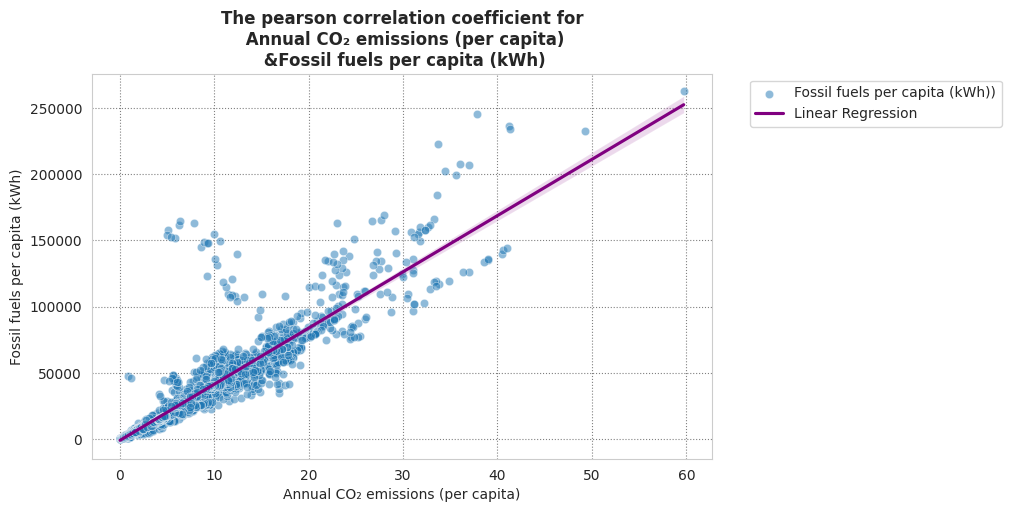

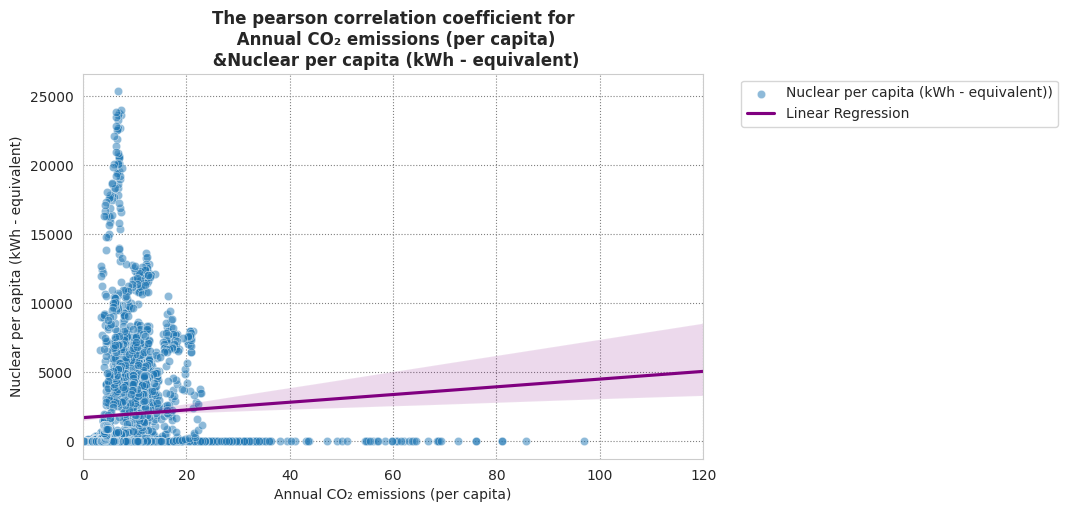

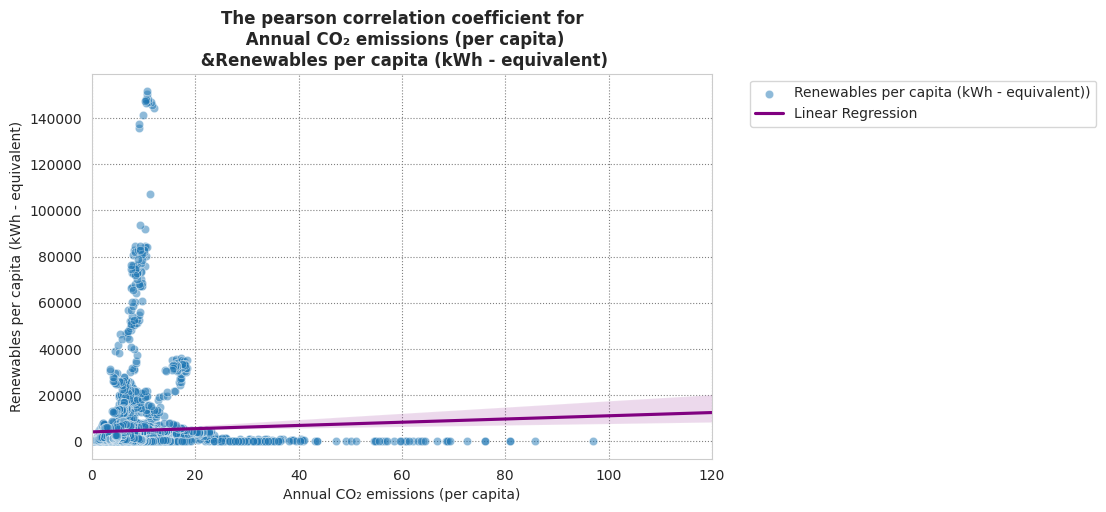

In [ ]:
#visualizing
#df_energy.columns
visulize_correlation(df_energy, 'Annual CO₂ emissions (per capita)', 'Fossil fuels per capita (kWh)')
visulize_correlation(df_energy, 'Annual CO₂ emissions (per capita)', 'Nuclear per capita (kWh - equivalent)', x_limit=(0, 120))
visulize_correlation(df_energy, 'Annual CO₂ emissions (per capita)', 'Renewables per capita (kWh - equivalent)', x_limit=(0, 120))

#### **01. Results**

In the analysis, the Pearson correlation coefficient between CO2 emissions per capita and fossil fuel usage was calculated to be *0.92*. This indicates a highly strong relationship between the two variables. The result suggests that as the usage of fossil fuels increases, there is a corresponding increase in CO2 emissions. In other words, a higher reliance on fossil fuels is closely associated with higher CO2 emissions.

In addition to the previous analysis, the Pearson correlation between nuclear energy and CO2 emissions was calculated to be *0.075*, and the Pearson correlation between renewable energy and CO2 emissions was found to be *0.051*.
The results indicate that there is a very weak positive correlation between nuclear energy and CO2 emissions, and an even weaker positive correlation between renewable energy and CO2 emissions. This means that as countries rely more on nuclear or renewable energy sources, the increase in CO2 emissions is minimal.

The high correlation coefficient of 0.92 between fossil fuel usage and CO2 emissions reaffirms that using more fossil fuels leads to a substantial increase in CO2 emissions.


## **02.   land-use change**

In [ ]:
#calculating correlation
df_landuse= pd.merge(df_co2, df_landuse, on=['Entity', 'Year'])
df_landuse.corr()

<ipython-input-435-5b8f74c9ed12>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_landuse.corr()


,Year,Annual CO₂ emissions (per capita),Annual CO₂ emissions from land-use change per capita
Year,1.000000,0.106713,-0.238456
Annual CO₂ emissions (per capita),0.106713,1.000000,-0.061786
Annual CO₂ emissions from land-use change per capita,-0.238456,-0.061786,1.000000


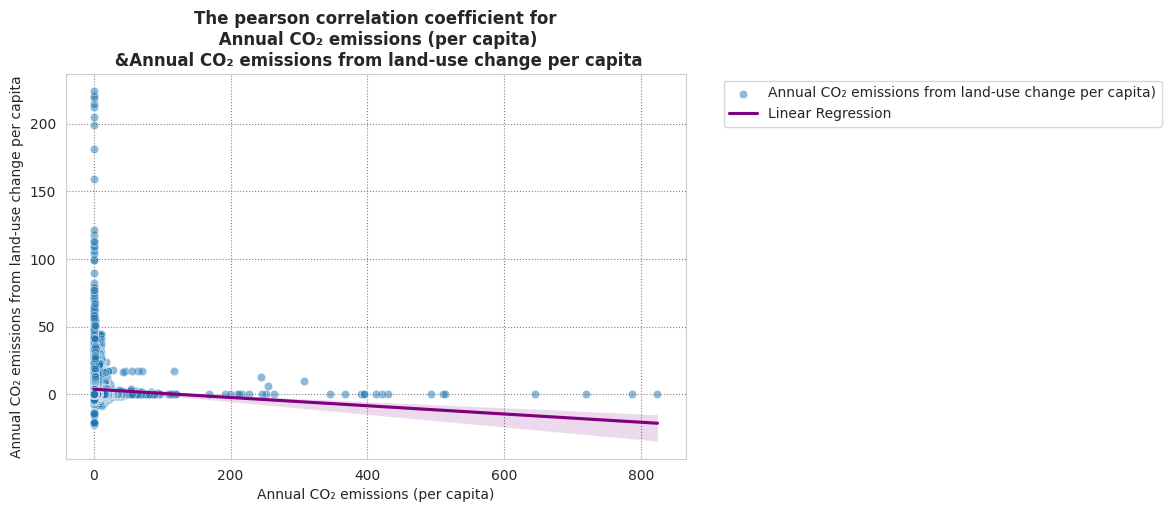

In [ ]:
#visualization
df_landuse.columns
visulize_correlation(df_landuse, 'Annual CO₂ emissions (per capita)', 'Annual CO₂ emissions from land-use change per capita')

#### **02. Results:**

The correlation coefficient between land use change and CO2 emissions is computed to be *-0.061*, indicating a negative relationship.

The weak negative correlation implies that land use change alone may not be a significant driver of CO2 emissions. Other factors such as industrial activities, energy production, and transportation likely play more dominant roles in influencing CO2 emissions.


## **03.  Food and diet**

No matter how we compare foods – whether it's by their weight, protein content, or calories – the result is the same: plant-based foods have a lower carbon footprint than meat and dairy. In many cases, the difference is quite significant.

To explore this further, I first examined the correlation coefficient between CO2 emissions and the consumption of meat and dairy products. Next, I extended the analysis to consider the complete range of food categories based on calorie intake, aiming to identify which types of food have the most significant impact on CO2 emissions. By investigating these relationships, we gain valuable insights into the potential environmental benefits of adopting plant-based diets and understanding the factors contributing to CO2 emissions from food consumption.

In [ ]:
#merging the relevant datasets
df_food = pd.merge(df_meat, df_dairy, on=['Entity', 'Year'] )
df_food_co2 = pd.merge(df_co2, df_food, on=['Entity', 'Year'] )
df_food_co2.corr()

<ipython-input-437-9a349cce81b6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_food_co2.corr()


,Year,Annual CO₂ emissions (per capita),Meat (kg per capita),Milk (kg per capita)
Year,1.000000,0.069742,0.221177,0.028674
Annual CO₂ emissions (per capita),0.069742,1.000000,0.477136,0.409452
Meat (kg per capita),0.221177,0.477136,1.000000,0.662091
Milk (kg per capita),0.028674,0.409452,0.662091,1.000000


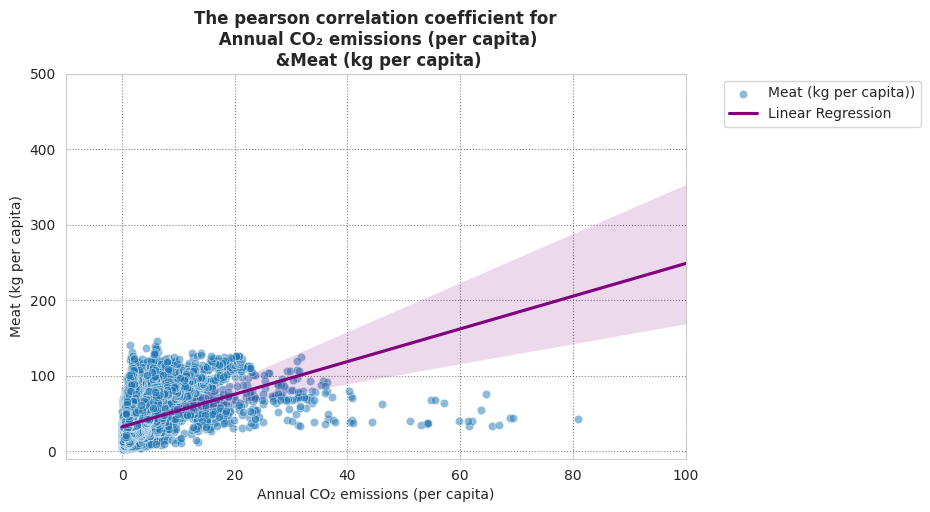

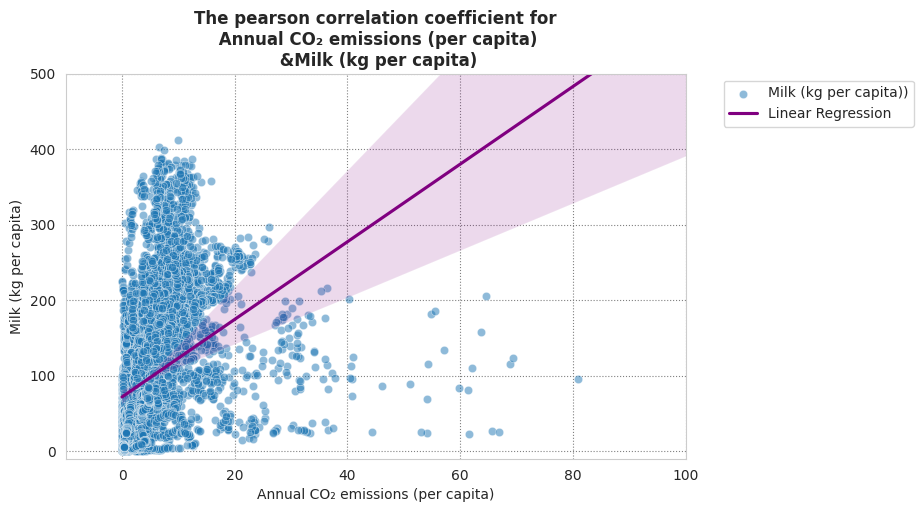

In [ ]:
#visulization
df_food_co2.columns
visulize_correlation(df_food_co2, 'Annual CO₂ emissions (per capita)', 'Meat (kg per capita)', x_limit=(-10, 100), y_limit=(-10, 500) )
visulize_correlation(df_food_co2, 'Annual CO₂ emissions (per capita)', 'Milk (kg per capita)', x_limit=(-10, 100), y_limit=(-10, 500))


In [ ]:
#general diet
df_diet_co2 = pd.merge(df_co2, df_diet, on=['Entity', 'Year'])
df_diet_co2.corr()

<ipython-input-439-129438a9071d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_diet_co2.corr()


,Year,Annual CO₂ emissions (per capita),Daily caloric intake per person from other commodities,Daily caloric intake per person from alcoholic beverages,Daily caloric intake per person from sugar,Daily caloric intake per person from oils and fats,Daily caloric intake per person from meat,Daily caloric intake per person from dairy and eggs,Daily caloric intake per person from fruits and vegetables,Daily caloric intake per person from starchy roots,Daily caloric intake per person from pulses,Daily caloric intake per person from cereals and grains
Year,1.000000,0.069742,0.368677,0.078213,0.079451,0.273061,0.207430,0.142053,0.163210,-0.037036,-0.002802,0.107157
Annual CO₂ emissions (per capita),0.069742,1.000000,0.368142,0.368116,0.383995,0.364593,0.420544,0.432971,0.184331,-0.188255,-0.187220,-0.088316
Daily caloric intake per person from other commodities,0.368677,0.368142,1.000000,0.393499,0.367572,0.343183,0.593825,0.498098,0.250032,-0.207128,-0.229649,-0.140575
Daily caloric intake per person from alcoholic beverages,0.078213,0.368116,0.393499,1.000000,0.423351,0.502772,0.603872,0.597207,0.215239,-0.080165,-0.243994,-0.290264
Daily caloric intake per person from sugar,0.079451,0.383995,0.367572,0.423351,1.000000,0.490163,0.546852,0.644394,0.168447,-0.395900,-0.175554,-0.187219
Daily caloric intake per person from oils and fats,0.273061,0.364593,0.343183,0.502772,0.490163,1.000000,0.580826,0.557167,0.266006,-0.095962,-0.294759,-0.269677
Daily caloric intake per person from meat,0.207430,0.420544,0.593825,0.603872,0.546852,0.580826,1.000000,0.659791,0.235558,-0.209345,-0.404746,-0.314773
Daily caloric intake per person from dairy and eggs,0.142053,0.432971,0.498098,0.597207,0.644394,0.557167,0.659791,1.000000,0.226796,-0.306305,-0.262179,-0.171802
Daily caloric intake per person from fruits and vegetables,0.163210,0.184331,0.250032,0.215239,0.168447,0.266006,0.235558,0.226796,1.000000,0.093923,0.090944,-0.246614
Daily caloric intake per person from starchy roots,-0.037036,-0.188255,-0.207128,-0.080165,-0.395900,-0.095962,-0.209345,-0.306305,0.093923,1.000000,0.076663,-0.452435


#### **03. Results**

The correlation analysis reveals interesting findings regarding the relationship between food types and CO2 emissions. Among the food categories, the highest correlation coefficient is observed for *'dairy and eggs'* with a value of *0.433*, followed closely by meat with a coefficient of *0.421*, and then *'sugar'* with a coefficient of *0.384*. On the other hand, the lowest correlation is observed for *grains* with -0.088 , *vegetables and fruits*, with a coefficient of 0.18, suggesting a weak relationship between these food types and CO2 emissions.

These results indicate that animal-based products, particularly dairy and meat, contribute more significantly to CO2 emissions compared to other food types. The positive correlation coefficients for dairy and meat suggest that an increase in their consumption is associated with higher CO2 emissions. Conversely, the negative correlation coefficient for grains, vegetables, and fruits suggests that higher consumption of these plant-based foods is linked to lower CO2 emissions.

Overall, the findings emphasize the importance of dietary choices in influencing CO2 emissions. Transitioning to more plant-based diets may play a crucial role in reducing the environmental impact associated with food consumption. By prioritizing the consumption of plant-based foods over animal-based products, individuals and policymakers can contribute to climate change mitigation efforts.

## **04. Agriculture**

In [ ]:
#merging the relevant datasets
df_agriculture_co2= pd.merge(df_co2, df_agriculture, on=['Entity', 'Year'] )
df_agriculture_co2.corr()

<ipython-input-440-d5d30a2ca942>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_agriculture_co2.corr()


,Year,Annual CO₂ emissions (per capita),Agricultural land
Year,1.000000,0.066904,-0.011842
Annual CO₂ emissions (per capita),0.066904,1.000000,0.027562
Agricultural land,-0.011842,0.027562,1.000000


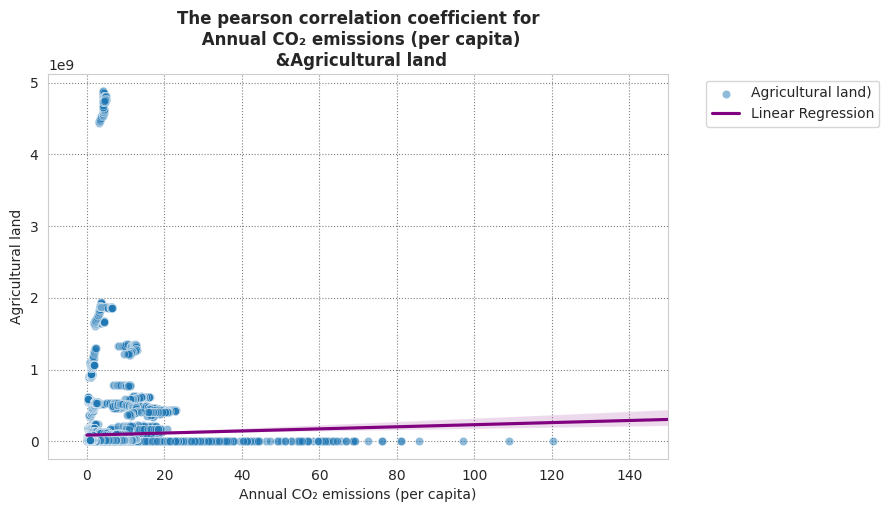

In [ ]:
#visualization
df_agriculture_co2.columns
visulize_correlation(df_agriculture_co2, 'Annual CO₂ emissions (per capita)', 'Agricultural land', x_limit=(-10, 150))

#### 04.Results

The analysis of the coefficient relationship between CO2 emissions and agricultural lands based on hectares per country is 0.028. This indicates a weak relationship between the two variables. In other words, the extent of agricultural land in a country, measured in hectares, has a minimal impact on its CO2 emissions.

A weak correlation coefficient suggests that the size of agricultural land alone is not a significant driver of CO2 emissions.

Further investigations are required to identify the key drivers and develop sustainable strategies to reduce emissions from the agricultural sector.



## **05.  GDP and Population**

In [ ]:
df_GDP.corr()

<ipython-input-442-6419d47ba0a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_GDP.corr()


,Year,Annual CO₂ emissions (per capita),GDP per capita,Population (historical estimates)
Year,1.000000,0.125331,0.293547,0.039976
Annual CO₂ emissions (per capita),0.125331,1.000000,0.608951,-0.009520
GDP per capita,0.293547,0.608951,1.000000,0.004110
Population (historical estimates),0.039976,-0.009520,0.004110,1.000000


In [ ]:
df_GDP.columns

Index(['Entity', 'Year', 'Annual CO₂ emissions (per capita)', 'GDP per capita',
       'Population (historical estimates)'],
      dtype='object')

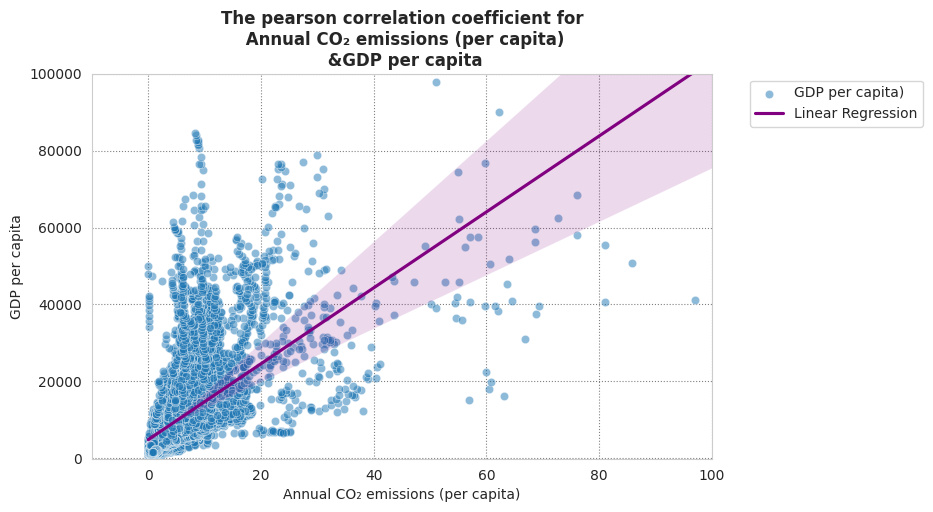

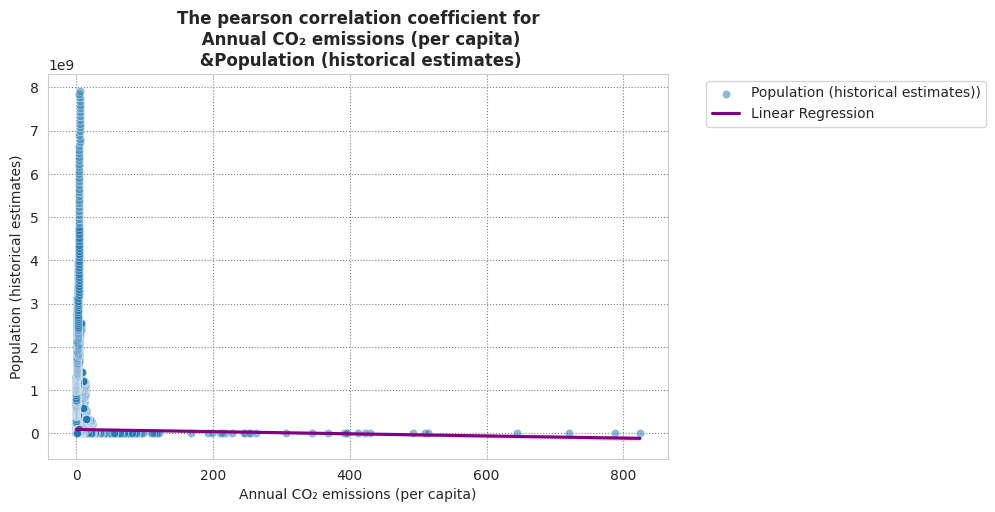

In [ ]:
#visualization
#df_GDP.columns
visulize_correlation(df_GDP, 'Annual CO₂ emissions (per capita)', 'GDP per capita', x_limit=(-10, 100), y_limit=(-100, 100000))
visulize_correlation(df_GDP, 'Annual CO₂ emissions (per capita)', 'Population (historical estimates)')

In [ ]:
df_energy_gdp_co2 = pd.merge(df_co2, df_primary_energy, on=['Entity', 'Year'])
df_energy_gdp_co2.corr()

<ipython-input-445-0ba1d33a1ec7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_energy_gdp_co2.corr()


,Year,Annual CO₂ emissions (per capita),Primary energy consumption per GDP (kWh/$)
Year,1.000000,-0.065379,-0.155829
Annual CO₂ emissions (per capita),-0.065379,1.000000,0.401580
Primary energy consumption per GDP (kWh/$),-0.155829,0.401580,1.000000


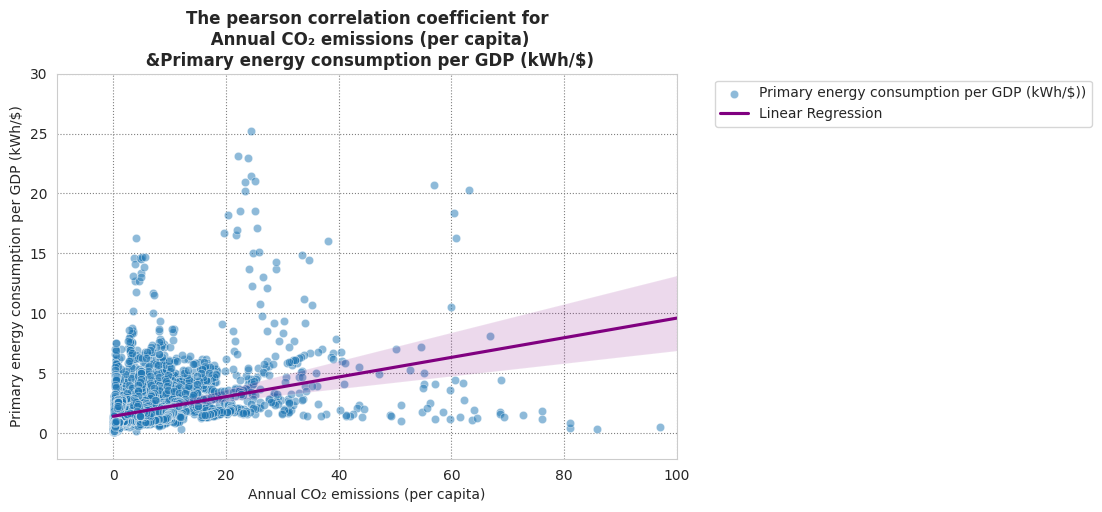

In [ ]:
#visualization
df_primary_energy.columns
visulize_correlation(df_energy_gdp_co2, 'Annual CO₂ emissions (per capita)', 'Primary energy consumption per GDP (kWh/$)', x_limit=(-10, 100), y_limit = (None, 30))

#### 05.Results

The correlation between *GDP* and CO2 emissions is ***positive and moderately strong*** with a coefficient of *0.61*. This indicates that countries with higher GDP tend to produce more CO2 emissions. In other words, economic growth is often resulting the increased energy consumption and industrial activities that lead to higher CO2 emissions.

The correlation between *energy consumption* and CO2
emissions based on GDP per capita is also ***moderately positive*** with a coefficient of 0.40. This suggests that wealthier countries have a higher demand for energy, and as a result, they generate more CO2 emissions through energy consumption.


The correlation between *population* and CO2 emissions is *weakly negative* with a coefficient of *-0.0095*. This implies that there is no strong evidence to support a direct relationship between population growth and CO2 emissions.

In summary, these findings shows that economic situation and energy consumption play a significant role in CO2 emissions, while population growth does not show a strong correlation.




## **06.  Transport**

### **a. Transport excluding international aviation**

In [ ]:
#The datasets shows the average per capita emissions of carbon dioxide from transport each year. This includes road, train, bus and domestic air travel but does not include international aviation and shipping.

In [ ]:
df_transport.columns


Index(['Entity', 'Year', 'Transport (per capita) (CAIT, 2020)'], dtype='object')

In [ ]:
df_transport_co2 = pd.merge(df_co2, df_transport, on=['Entity', 'Year'])
df_transport_co2.corr()

<ipython-input-449-895c30efa59f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_transport_co2.corr()


,Year,Annual CO₂ emissions (per capita),"Transport (per capita) (CAIT, 2020)"
Year,1.000000,-0.020189,0.067262
Annual CO₂ emissions (per capita),-0.020189,1.000000,0.560529
"Transport (per capita) (CAIT, 2020)",0.067262,0.560529,1.000000


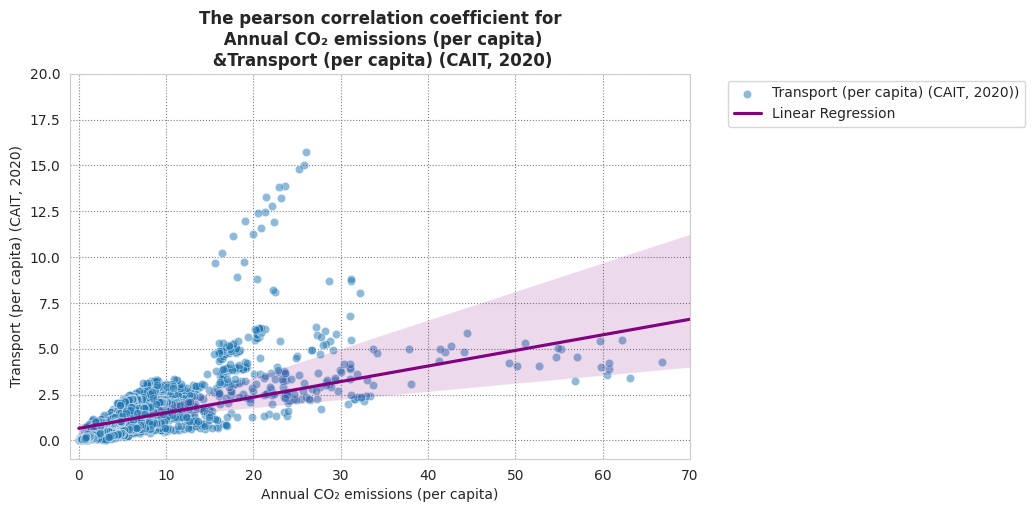

In [ ]:
#visualization

visulize_correlation(df_transport_co2, 'Annual CO₂ emissions (per capita)', 'Transport (per capita) (CAIT, 2020)', x_limit=(-1, 70), y_limit=(-1, 20))


*I will now also have a look at the data for international aviation and renewable vehicles. It is important to note that the dataset for international aviation only covers the year of 2018 and renewable vehicles is limited to Europe.*

### **b. Aviation- international**

In [ ]:
df_aviation_co2 = pd.merge(df_co2, df_aviation, on=['Entity', 'Year'])
df_aviation_co2.corr()

<ipython-input-451-45e08ee66037>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_aviation_co2.corr()


,Year,Annual CO₂ emissions (per capita),Per capita international aviation CO2
Year,NaN,NaN,NaN
Annual CO₂ emissions (per capita),NaN,1.000000,0.450047
Per capita international aviation CO2,NaN,0.450047,1.000000


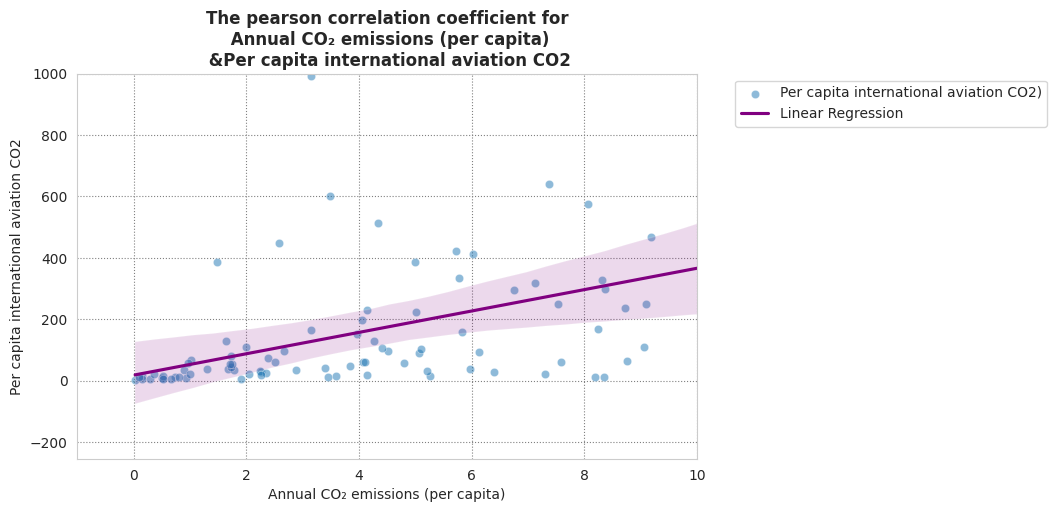

In [ ]:
#visualization

visulize_correlation(df_aviation_co2, 'Annual CO₂ emissions (per capita)', 'Per capita international aviation CO2', x_limit=(-1, 10), y_limit=(None, 1000))


### **c. Renewable vehicles ownership**

In [ ]:
#filling the missing values with 0
df_europe_vehicles = df_europe_vehicles.fillna(0)
#adding a total numbers of cars column
df_europe_vehicles['total_cars'] = df_europe_vehicles['battery_electric_number'] + df_europe_vehicles['plugin_hybrid_number'] + df_europe_vehicles['full_mild_hybrid_number'] + df_europe_vehicles['petrol_number'] + df_europe_vehicles['diesel_gas_number']
#merging population column to the dataset, to be able to calculate the correclation correctly
df_vehicles = pd.merge(df_GDP, df_europe_vehicles, on=['Entity', 'Year'])
df_vehicles.columns
df_vehicles.drop(columns = 'GDP per capita', inplace = True)


In [ ]:
df_vehicles.columns

Index(['Entity', 'Year', 'Annual CO₂ emissions (per capita)',
       'Population (historical estimates)', 'battery_electric_number',
       'plugin_hybrid_number', 'full_mild_hybrid_number', 'petrol_number',
       'diesel_gas_number', 'total_cars'],
      dtype='object')

In [ ]:
#dividing function and making a new dataframe
def divide_column(df, column_to_divide):
    df_cars = df_vehicles.copy()
    population = 'Population (historical estimates)'
    for col in column_to_divide:
        df_cars[col] = df_cars[col] / df_cars[population]
    return df_cars

In [ ]:
column_to_divide = ['battery_electric_number', 'plugin_hybrid_number', 'full_mild_hybrid_number', 'petrol_number', 'diesel_gas_number', 'total_cars']
df_cars_co2 = divide_column(df_vehicles, column_to_divide )

In [ ]:
df_cars_co2.corr()

<ipython-input-457-301f65643211>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cars_co2.corr()


,Year,Annual CO₂ emissions (per capita),Population (historical estimates),battery_electric_number,plugin_hybrid_number,full_mild_hybrid_number,petrol_number,diesel_gas_number,total_cars
Year,1.000000,-0.347437,0.128758,0.312290,0.371920,0.655635,-0.271053,-0.088562,-0.134271
Annual CO₂ emissions (per capita),-0.347437,1.000000,-0.154258,-0.042256,-0.054782,-0.127893,0.512500,0.704391,0.775326
Population (historical estimates),0.128758,-0.154258,1.000000,-0.024376,-0.029408,-0.109802,-0.169700,-0.126780,-0.181203
battery_electric_number,0.312290,-0.042256,-0.024376,1.000000,0.750647,0.642201,-0.095696,-0.088662,-0.008529
plugin_hybrid_number,0.371920,-0.054782,-0.029408,0.750647,1.000000,0.748409,-0.005750,-0.057800,0.054556
full_mild_hybrid_number,0.655635,-0.127893,-0.109802,0.642201,0.748409,1.000000,0.067384,-0.021814,0.109636
petrol_number,-0.271053,0.512500,-0.169700,-0.095696,-0.005750,0.067384,1.000000,0.256009,0.635680
diesel_gas_number,-0.088562,0.704391,-0.126780,-0.088662,-0.057800,-0.021814,0.256009,1.000000,0.900943
total_cars,-0.134271,0.775326,-0.181203,-0.008529,0.054556,0.109636,0.635680,0.900943,1.000000


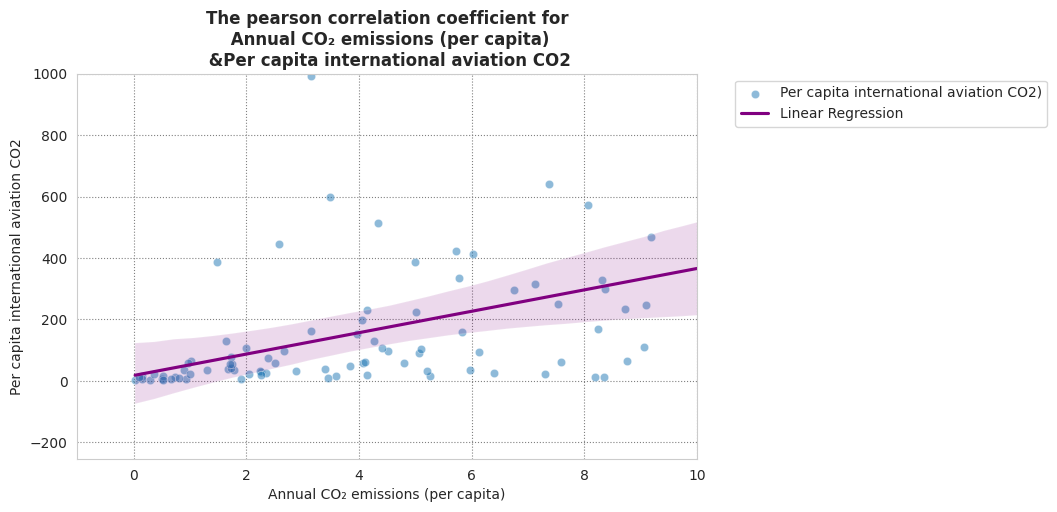

In [ ]:
#visualization
visulize_correlation(df_aviation_co2, 'Annual CO₂ emissions (per capita)', 'Per capita international aviation CO2', x_limit=(-1, 10), y_limit=(None, 1000))

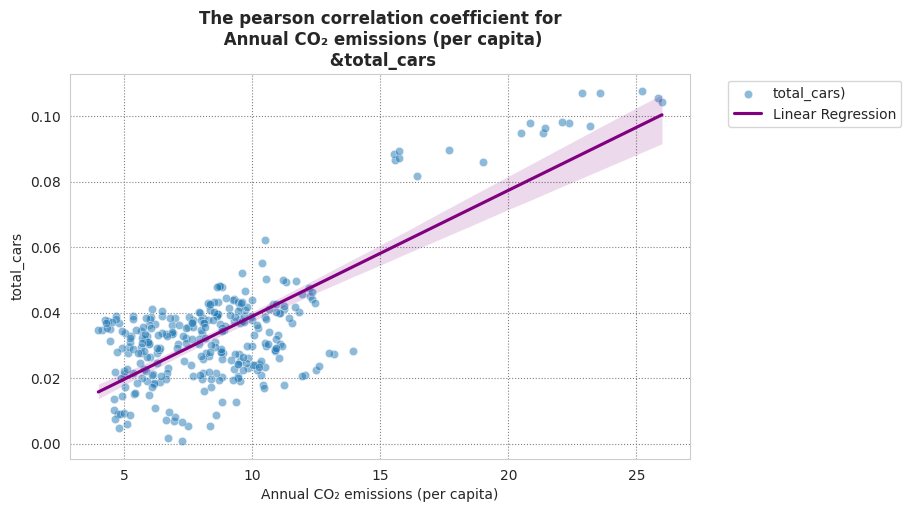

In [ ]:
#visualization
visulize_correlation(df_cars_co2, 'Annual CO₂ emissions (per capita)', 'total_cars')

### 06.Results

The correlation coefficient between **transport** (excluding international aviation and shipping) and CO2 emissions is *0.56*. This indicates a moderate **positive** relationship from the year 1990 onwards, suggesting that the transport sector is a significant contributor to CO2 emissions.

The correlation between international **aviation** and CO2 emissions is *0.45*.  This relationship is **positive** but less strong, indicating that aviation may not be a major contributor to CO2 emissions compared to other transport types.

The correlation between CO2 emissions and cars in Europe is *0.77*. Which is a **strong positive** correlation. This means that more cars are associated with higher CO2 emissions in Europe.
Within the cars category, **diesel** and **petrol** cars contribute more to CO2 emissions than other types. **Electric** cars produce the least amount of CO2 emissions in the given period and region.


## **07.  Gross national income (GNI) and Gini index**

In [ ]:
#df_GNI.columns

Index(['Entity', 'Year',
       'GNI per capita, PPP (constant 2017 international $)'],
      dtype='object')

In [ ]:
df_GNI_co2 = pd.merge(df_co2, df_GNI, on=['Entity', 'Year'] )
df_GNI_co2.corr()

<ipython-input-469-113661844014>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_GNI_co2.corr()


,Year,Annual CO₂ emissions (per capita),"GNI per capita, PPP (constant 2017 international $)"
Year,1.000000,0.023442,0.114663
Annual CO₂ emissions (per capita),0.023442,1.000000,0.816007
"GNI per capita, PPP (constant 2017 international $)",0.114663,0.816007,1.000000


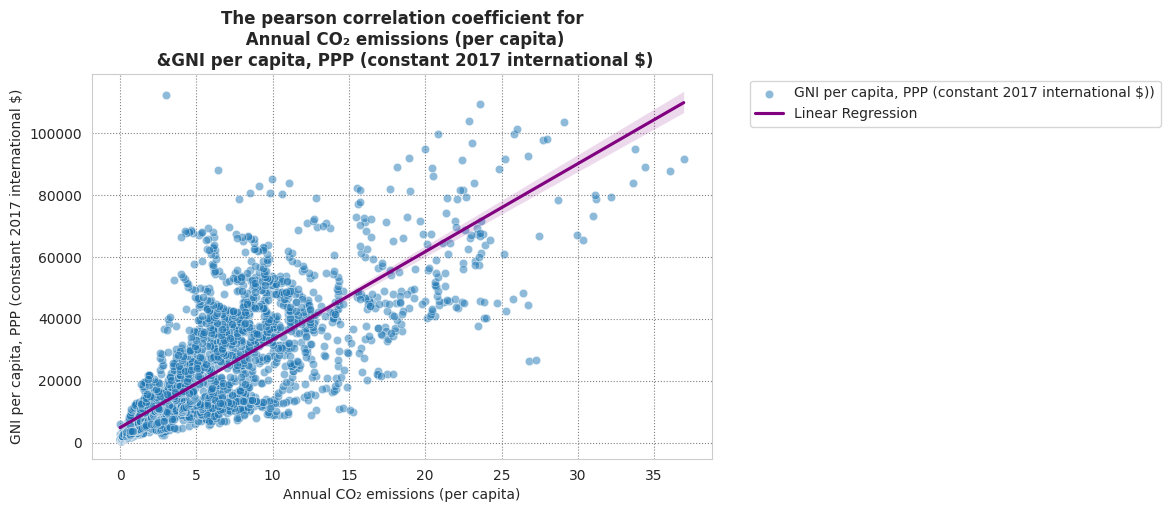

In [ ]:
#visualization
visulize_correlation(df_GNI_co2, 'Annual CO₂ emissions (per capita)', 'GNI per capita, PPP (constant 2017 international $)')

In [ ]:
df_gini_co2 = pd.merge(df_co2, df_gini, on=['Entity', 'Year'] )
df_gini_co2.corr()

<ipython-input-462-3f7295405412>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_gini_co2.corr()


,Year,Annual CO₂ emissions (per capita),Gini coefficient
Year,1.000000,-0.023339,-0.144582
Annual CO₂ emissions (per capita),-0.023339,1.000000,-0.433344
Gini coefficient,-0.144582,-0.433344,1.000000


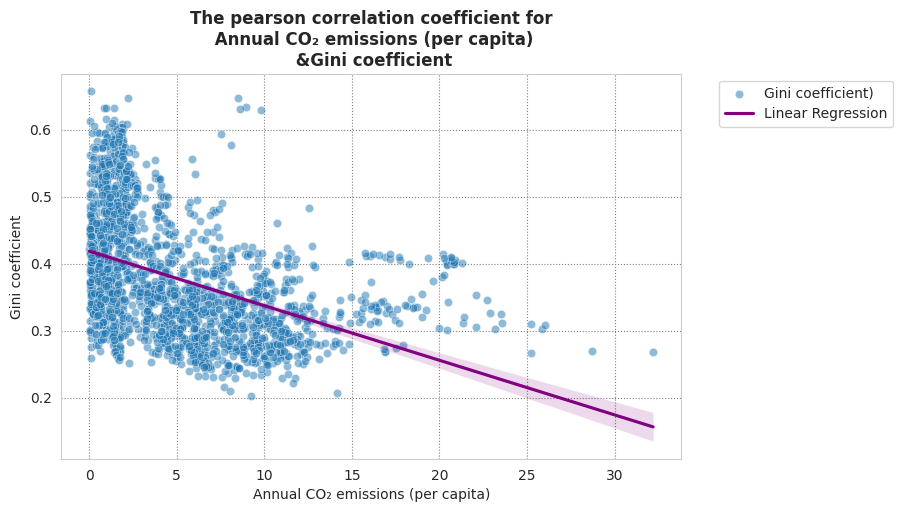

In [ ]:
#visualization
visulize_correlation(df_gini_co2, 'Annual CO₂ emissions (per capita)', 'Gini coefficient')

#### 07.Results

The correlation between **Gross National Income** (GNI) and CO2 emissions is almost *0.82*, indicating a **very strong positive relationship**. This suggests that countries with higher income tend to produce more CO2 emissions.

On the contrary, the correlation between **the Gini Index** (income inequality) and CO2 emissions is *-0.43*. This reveals **a weak negative** relationship. This can mean that there might be a connection between income inequality and CO2 emissions, where more equal income distribution could potentially lead to lower CO2 emissions.

Overall, While higher national income appears to be associated with increased CO2 emissions, the relationship between income inequality and CO2 emissions is not straightforward and requires further investigation.

# **IV- Conclusion**

---



In [566]:
#to have a bettwer overview of our findings, I will put all the data together
all_data = [ df_energy, df_landuse, df_food_co2, df_agriculture_co2, df_GDP, df_energy_gdp_co2, df_transport_co2, df_aviation_co2, df_cars_co2, df_GNI_co2, df_gini_co2]
#combining them into new datset
df_all = pd.concat(all_data)
#correlation based on CO2 emission
corr_df = df_all.corr()['Annual CO₂ emissions (per capita)']

In [577]:
# using pandas nsmallest and nlargest to see the factors with most and least correlations sorted
print('10 factors that have the most impact on producing CO2 emissions')
corr_df.nlargest(10)

10 factors that have the most impact on producing CO2 emissions


Annual CO₂ emissions (per capita)                      1.000000
Fossil fuels per capita (kWh)                          0.920268
GNI per capita, PPP (constant 2017 international $)    0.816007
total_cars                                             0.775326
diesel_gas_number                                      0.704391
GDP per capita                                         0.608951
Transport (per capita) (CAIT, 2020)                    0.560529
petrol_number                                          0.512500
Meat (kg per capita)                                   0.477136
Per capita international aviation CO2                  0.450047
Name: Annual CO₂ emissions (per capita), dtype: float64

In [578]:
# using pandas nsmallest and nlargest to see the factors with most and least correlations sorted
print('10 factors that have the least impact on producing CO2 emissions')
corr_df.nsmallest(10)

10 factors that have the least impact on producing CO2 emissions


Gini coefficient                                       -0.433344
full_mild_hybrid_number                                -0.127893
Annual CO₂ emissions from land-use change per capita   -0.061786
plugin_hybrid_number                                   -0.054782
battery_electric_number                                -0.042256
Population (historical estimates)                      -0.010172
Agricultural land                                       0.027562
Renewables per capita (kWh - equivalent)                0.050560
Nuclear per capita (kWh - equivalent)                   0.074822
Year                                                    0.115976
Name: Annual CO₂ emissions (per capita), dtype: float64

Based on the analysis, the top 5 factors that have the most impact on producing CO2 emissions in the world are:


1. Fossil fuels
2. GNI per capita
3. GDP per capita
4. Transport
5. Meat consumption


These factors are closely associated with higher CO2 emissions, as expected. Cars, industrial activities, reliance on fossil fuels, and higher income levels can lead to increased CO2 emissions. It is essential to shift to sustainable practices, transition to renewable energy sources, and implement efficient transportation and industrial strategies  to ensure better future for our planet.

(!!! In the overall list, I did not include the specific subcategories of diesel and petrol and cars since the data was limited to Europe.)